In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
from plotly.offline import init_notebook_mode
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv("autism_screening.csv")

In [ ]:
df.head()

In [4]:
df.shape

(704, 21)

In [ ]:
df.info()

In [6]:
df["ethnicity"].value_counts()

White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: ethnicity, dtype: int64

In [7]:
df["ethnicity"] = df["ethnicity"].str.replace("others", "Others")
df["ethnicity"] = df["ethnicity"].str.replace("?", "Others")

In [8]:
#jundice - austim - used_app_before - Class/ASD
df["jundice"] = df["jundice"].map({"no": 0, "yes": 1})
df["austim"] = df["austim"].map({"no": 0, "yes": 1})
df["used_app_before"] = df["used_app_before"].map({"no": 0, "yes": 1})

In [9]:
df["Class/ASD"] = df["Class/ASD"].map({"NO": 0, "YES": 1})

In [10]:
classes = df["Class/ASD"].value_counts()

values = classes.values
names = classes.index

fig = px.pie(df, values=values, names=names, hole=0.5)
fig.show()

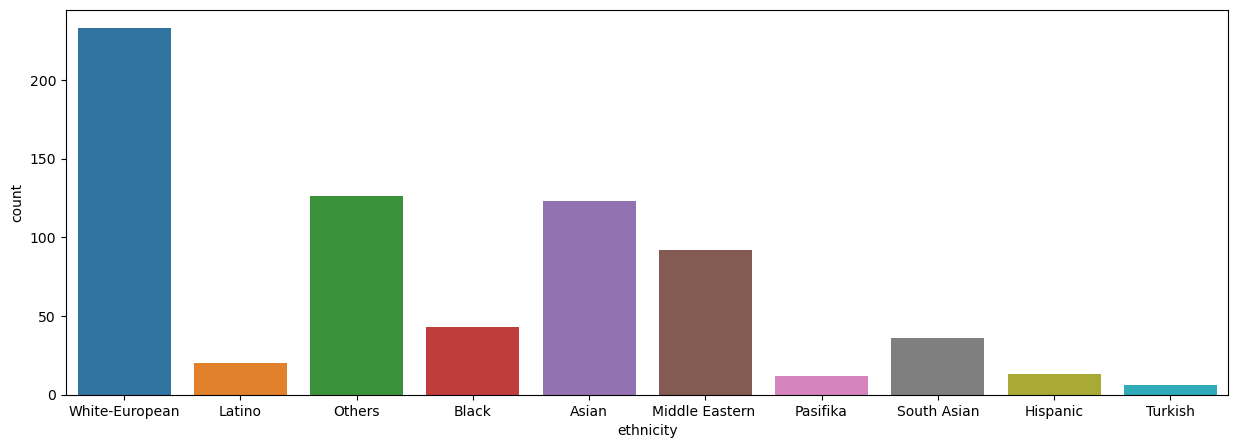

In [11]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df["ethnicity"])
plt.show()

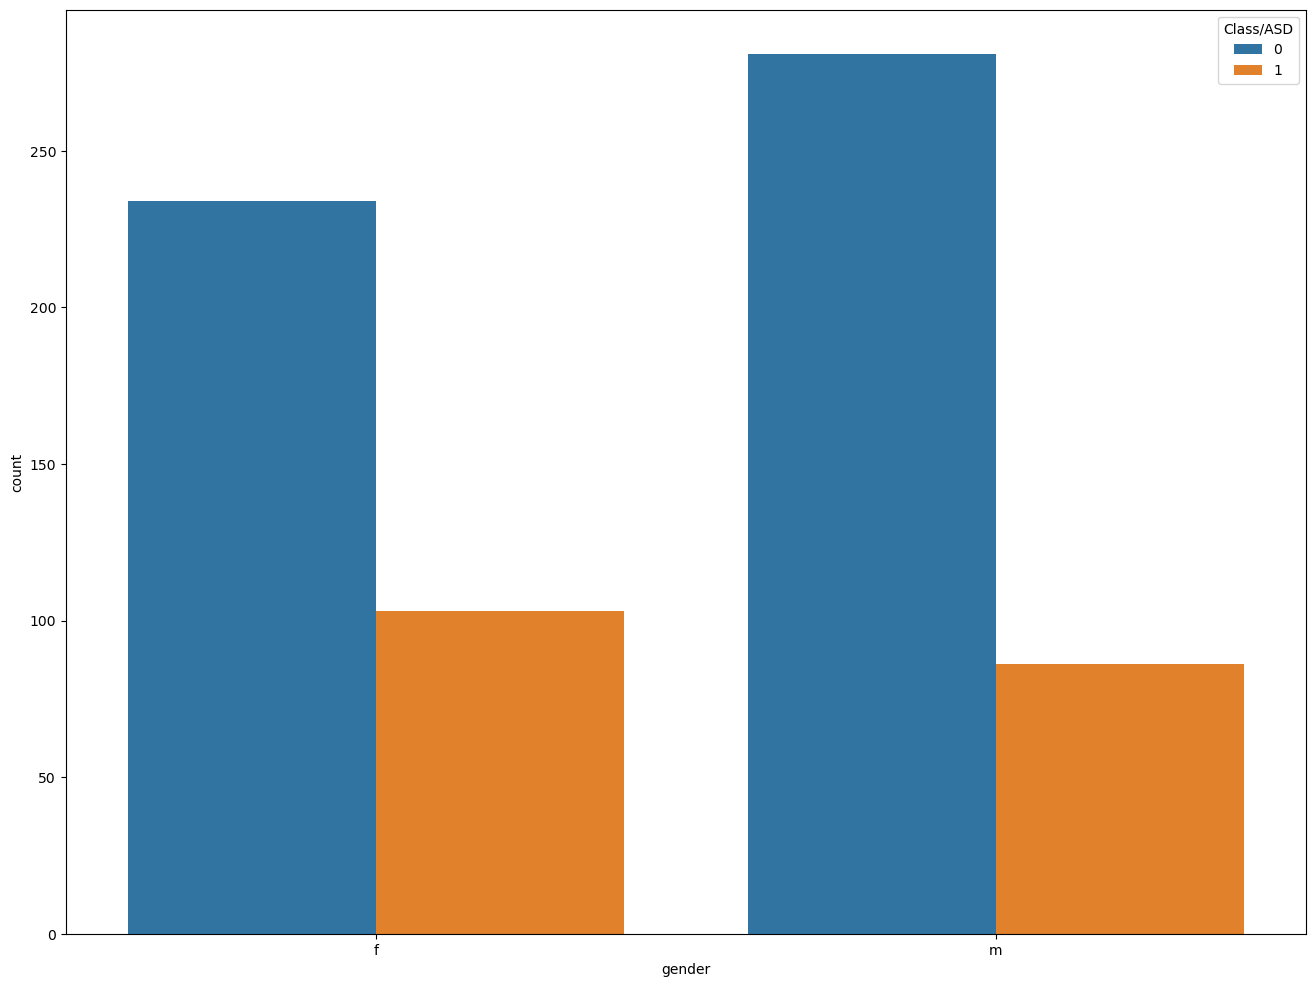

In [12]:
plt.figure(figsize=(16, 12))
sns.countplot(x=df["gender"], hue=df["Class/ASD"])
plt.show()

In [ ]:
df.isnull().sum()

In [15]:
df = df.dropna(how="any")

In [ ]:
df.head()

In [17]:
df["relation"].value_counts()

Self                        522
?                            93
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: relation, dtype: int64

In [18]:
df["relation"] = df["relation"].str.replace("?", "Others")

In [ ]:
df.head()

In [20]:
df["ethnicity"].value_counts()

White-European     233
Others             124
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
Name: ethnicity, dtype: int64

In [21]:
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [22]:
df["ethnicity"] = label_encoder(df["ethnicity"])

ethnicity ['Asian' 'Black' 'Hispanic' 'Latino' 'Middle Eastern ' 'Others' 'Pasifika'
 'South Asian' 'Turkish' 'White-European']


In [23]:
df["relation"] = label_encoder(df["relation"])

relation ['Health care professional' 'Others' 'Parent' 'Relative' 'Self']


In [24]:
df["gender"] = label_encoder(df["gender"])

gender ['f' 'm']


In [ ]:
df.head()

In [26]:
ndf = df.drop(["contry_of_res", "age_desc"], axis=1)

In [27]:
ndf["age"] = ndf["age"].astype("int64")
ndf["result"] = ndf["result"].astype("int64")

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(ndf.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [29]:
X = ndf.drop(["Class/ASD"], axis=1)
y = ndf["Class/ASD"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = logreg.predict(X_test)

In [33]:
roc_auc_score(y_test, y_pred)

1.0

In [34]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [35]:
y_pred = xgb_model.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred)

1.0

In [37]:
svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)

SVC()

In [38]:
y_pred = svc_model.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.9432624113475178

In [ ]:
ndf.columns

In [ ]:
ndf.head()

In [42]:
test = np.array([[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 32, 1, 9, 0, 0, 0, 6, 4]])

In [43]:
logreg.predict(test), xgb_model.predict(test), svc_model.predict(test)

(array([0]), array([0]), array([0]))

In [44]:
pickle.dump(logreg, open("logreg.pkl", "wb"))

In [45]:
pickle.dump(svc_model, open("svc.pkl", "wb"))

In [46]:
pickle.dump(xgb_model, open("xgb.pkl", "wb"))